In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sts
import numpy as np
from scipy.stats import t

df = pd.read_csv("Stock Returns.csv",skiprows=3, header=0)
df = df.drop(columns = ["Unnamed: 0"])

df['Apple Stock Return(AAPL)'] = df['Apple Stock Return(AAPL)'].str.replace('%', '')
df['Apple Stock Return(AAPL)'] = df['Apple Stock Return(AAPL)'].astype(float)

df['Alphabet Stock Return (GOOGL)'] = df['Alphabet Stock Return (GOOGL)'].str.replace('%', '')
df['Alphabet Stock Return (GOOGL)'] = df['Alphabet Stock Return (GOOGL)'].astype(float)

df['Bank of America Stock Return (BAC)'] = df['Bank of America Stock Return (BAC)'].str.replace('%', '')
df['Bank of America Stock Return (BAC)'] = df['Bank of America Stock Return (BAC)'].astype(float)

df

,Date,Apple Stock Return(AAPL),Alphabet Stock Return (GOOGL),Bank of America Stock Return (BAC)
0,1/4/2017,-0.11,-0.03,1.86
1,1/5/2017,0.51,0.65,-1.18
2,1/6/2017,1.11,1.50,0.00
3,1/9/2017,0.92,0.24,-0.57
4,1/10/2017,0.10,-0.14,1.73
...,...,...,...,...
98,5/25/2017,0.35,1.46,-0.47
99,5/26/2017,-0.17,0.14,-0.04
100,5/30/2017,0.04,0.29,-1.42
101,5/31/2017,-0.59,-0.91,-2.18


In [3]:
print(df["Apple Stock Return(AAPL)"].mean())
print(df["Apple Stock Return(AAPL)"].median())
print(df["Apple Stock Return(AAPL)"].mode())

0.273398058252427
0.08
0   -0.59
1   -0.23
2   -0.12
3    0.04
Name: Apple Stock Return(AAPL), dtype: float64


In [4]:
print(df["Alphabet Stock Return (GOOGL)"].mean())
print(df["Alphabet Stock Return (GOOGL)"].median())
print(df["Alphabet Stock Return (GOOGL)"].mode())

0.19932038834951465
0.19
0   -0.04
1    0.19
2    0.29
3    0.46
Name: Alphabet Stock Return (GOOGL), dtype: float64


In [5]:
print(df["Bank of America Stock Return (BAC)"].mean())
print(df["Bank of America Stock Return (BAC)"].median())
print(df["Bank of America Stock Return (BAC)"].mode())

0.016019417475728177
-0.04
0   -0.04
1    0.00
Name: Bank of America Stock Return (BAC), dtype: float64


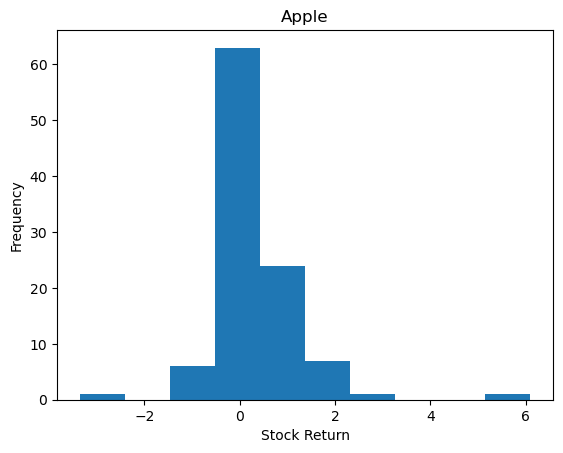

In [6]:
plt.hist(df['Apple Stock Return(AAPL)'], bins=10)
plt.xlabel('Stock Return')
plt.ylabel('Frequency')
plt.title('Apple')
plt.show()

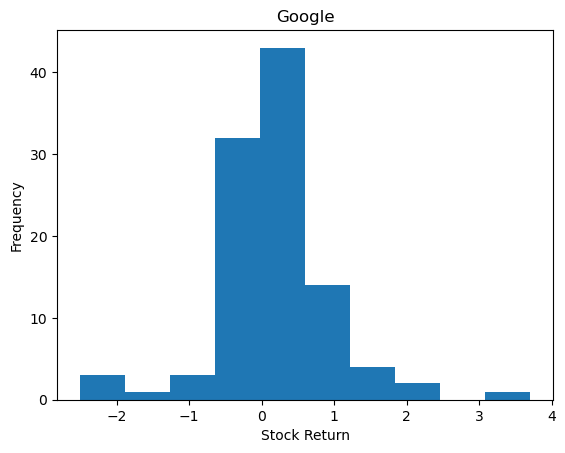

In [7]:
plt.hist(df['Alphabet Stock Return (GOOGL)'], bins=10)
plt.xlabel('Stock Return')
plt.ylabel('Frequency')
plt.title('Google')
plt.show()

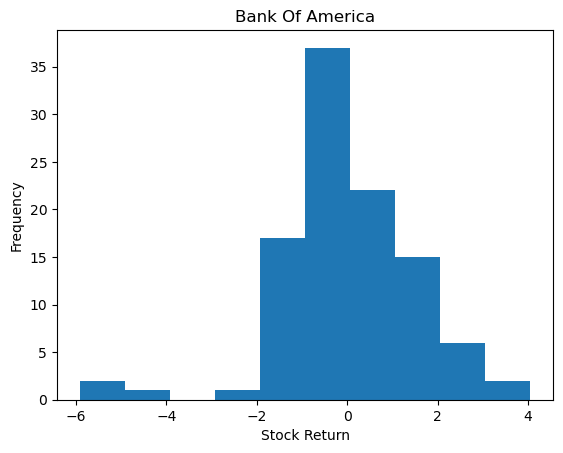

In [8]:
plt.hist(df['Bank of America Stock Return (BAC)'], bins=10)
plt.xlabel('Stock Return')
plt.ylabel('Frequency')
plt.title('Bank Of America')
plt.show()

Skewness, Variance and Standard Deviation

In [9]:
print("Apple")
print(df['Apple Stock Return(AAPL)'].skew())
print(df['Apple Stock Return(AAPL)'].var())
print(df['Apple Stock Return(AAPL)'].std())

Apple
2.007847835648069
0.9356461831334477
0.9672880559241118


In [10]:
print("Google")
print(df['Alphabet Stock Return (GOOGL)'].skew())
print(df['Alphabet Stock Return (GOOGL)'].var())
print(df['Alphabet Stock Return (GOOGL)'].std())

Google
0.23410031279956156
0.6878632590900438
0.8293752221341337


In [11]:
print("Bank of America")
print(df['Bank of America Stock Return (BAC)'].skew())
print(df['Bank of America Stock Return (BAC)'].var())
print(df['Bank of America Stock Return (BAC)'].std())

Bank of America
-0.8318961667939689
2.284030078050638
1.5113007900648494


Coefficient of variation

In [12]:
print(df['Apple Stock Return(AAPL)'].std() / df['Apple Stock Return(AAPL)'].mean() * 100)
print(df['Alphabet Stock Return (GOOGL)'].std() / df['Alphabet Stock Return (GOOGL)'].mean() * 100)
print(df['Bank of America Stock Return (BAC)'].std() / df['Bank of America Stock Return (BAC)'].mean() * 100)

353.8020943188337
416.1015483673441
9434.180689495715


Covariance and Correlation

In [13]:
print("AAPL vs GOOGL")
print(df['Apple Stock Return(AAPL)'].cov(df['Alphabet Stock Return (GOOGL)']))
print(df['Apple Stock Return(AAPL)'].corr(df['Alphabet Stock Return (GOOGL)']))
print("AAPL vs BAC")
print(df['Apple Stock Return(AAPL)'].cov(df['Bank of America Stock Return (BAC)']))
print(df['Apple Stock Return(AAPL)'].corr(df['Bank of America Stock Return (BAC)']))
print("GOOGL vs BAC")
print(df['Alphabet Stock Return (GOOGL)'].cov(df['Bank of America Stock Return (BAC)']))
print(df['Alphabet Stock Return (GOOGL)'].corr(df['Bank of America Stock Return (BAC)']))

AAPL vs GOOGL
0.21622586141252617
0.26952605476485203
AAPL vs BAC
0.6237136588616029
0.4266566512670834
GOOGL vs BAC
0.5643090329335617
0.45020989523305216


In [15]:
def calculate_stats(df, column):
    data = df[column].dropna() # remove any missing values
    n = len(data)
    mean = data.mean()
    std = data.std(ddof=1) # using ddof=1 for sample standard deviation
    stderr = std / np.sqrt(n)
    alpha = 0.05 # 95% confidence interval
    t_value = t.ppf(1 - alpha/2, n-1) # t-value for the given sample size and confidence level
    ci_lower = mean - t_value * stderr
    ci_upper = mean + t_value * stderr
    
    print(f"Mean: {mean:.3f}")
    print(f"Standard deviation: {std:.3f}")
    print(f"95% Confidence interval: [{ci_lower:.3f}, {ci_upper:.3f}]")
    
calculate_stats(df, "")

KeyError: ''